<a href="https://colab.research.google.com/github/vamanpreet/Parameter-Optimization-Assignment/blob/main/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas scikit-learn matplotlib seaborn optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 11.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
import optuna

In [3]:
# Load dataset from UCI via OpenML
dataset = fetch_openml(name="letter", version=1, as_frame=True)
df = dataset.frame

In [4]:
# Features and labels
X = df.drop(columns="class")
y = df["class"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Store performance
results = []
best_accuracy = 0
best_convergence = []

In [8]:
def optimize_svm(X_train, X_test, y_train, y_test):
    accuracy_log = []

    def objective(trial):
        kernel = trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
        nu = trial.suggest_float("nu", 0.1, 0.9)
        epsilon = trial.suggest_float("epsilon", 0.01, 1.0)
        model = svm.NuSVC(kernel=kernel, nu=nu)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracy_log.append(acc)
        return acc

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10)
    return study.best_value, study.best_params, accuracy_log

In [9]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=i)
    acc, params, log = optimize_svm(X_train, X_test, y_train, y_test)
    results.append((f"S{i+1}", acc, params))

    if acc > best_accuracy:
        best_accuracy = acc
        best_convergence = log
        best_sample = f"S{i+1}"

[I 2025-04-17 09:16:22,915] A new study created in memory with name: no-name-ad71ee42-f0dd-4ae3-a3c6-d98f380a24fb
[I 2025-04-17 09:16:29,583] Trial 0 finished with value: 0.9263333333333333 and parameters: {'kernel': 'poly', 'nu': 0.15223377375113092, 'epsilon': 0.04833994188343414}. Best is trial 0 with value: 0.9263333333333333.
[I 2025-04-17 09:16:44,643] Trial 1 finished with value: 0.7771666666666667 and parameters: {'kernel': 'poly', 'nu': 0.5362079099249067, 'epsilon': 0.5017317978504168}. Best is trial 0 with value: 0.9263333333333333.
[I 2025-04-17 09:16:59,703] Trial 2 finished with value: 0.6321666666666667 and parameters: {'kernel': 'linear', 'nu': 0.8518763874106335, 'epsilon': 0.5474129558750218}. Best is trial 0 with value: 0.9263333333333333.
[I 2025-04-17 09:17:14,851] Trial 3 finished with value: 0.7341666666666666 and parameters: {'kernel': 'linear', 'nu': 0.6122551850127119, 'epsilon': 0.13283354119270893}. Best is trial 0 with value: 0.9263333333333333.
[I 2025-04-

In [10]:
table_df = pd.DataFrame(results, columns=["Sample #", "Best Accuracy", "Best SVM Parameters"])
print("\nTable 1: Comparative performance of Optimized-SVM with different samples\n")
print(table_df)


Table 1: Comparative performance of Optimized-SVM with different samples

   Sample #  Best Accuracy                                Best SVM Parameters
0        S1       0.946333  {'kernel': 'rbf', 'nu': 0.10044888916634483, '...
1        S2       0.949500  {'kernel': 'rbf', 'nu': 0.10032921964345197, '...
2        S1       0.926333  {'kernel': 'poly', 'nu': 0.15223377375113092, ...
3        S2       0.812333  {'kernel': 'linear', 'nu': 0.14047947843816752...
4        S3       0.918000  {'kernel': 'poly', 'nu': 0.16913281313937184, ...
5        S4       0.827500  {'kernel': 'rbf', 'nu': 0.4818784488723552, 'e...
6        S5       0.928500  {'kernel': 'poly', 'nu': 0.1390566242767428, '...
7        S6       0.793333  {'kernel': 'linear', 'nu': 0.3911714235503204,...
8        S7       0.841500  {'kernel': 'poly', 'nu': 0.38249137910833186, ...
9        S8       0.869333  {'kernel': 'rbf', 'nu': 0.30067286506412483, '...
10       S9       0.900000  {'kernel': 'rbf', 'nu': 0.2388917069253

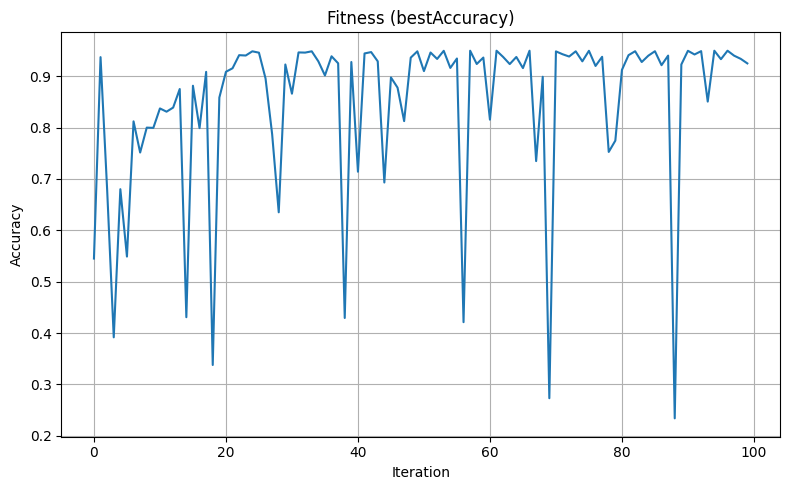

In [11]:
# Plot convergence graph
plt.figure(figsize=(8, 5))
plt.plot(best_convergence)
plt.title("Fitness (bestAccuracy)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.savefig("convergence_graph.png")
plt.show()


Basic Data Analytics:
              x-box         y-box         width         high         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              x-bar         y-bar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354    

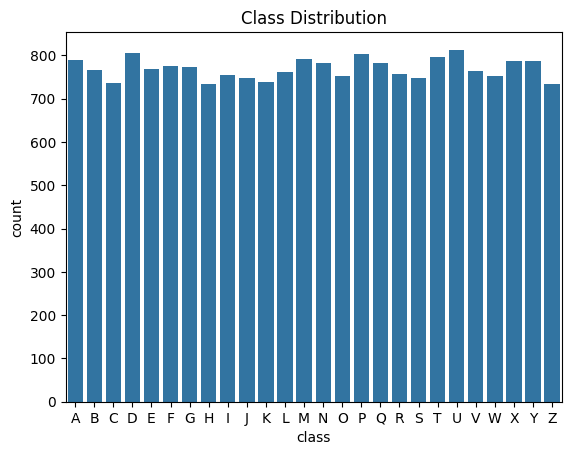

In [12]:
# Data analytics
print("\nBasic Data Analytics:")
print(df.describe())
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()